In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set file path
file_path = '/Users/alan/Desktop/海外申请/Predoc/Coding Sample/Python coding sample/microdata.csv'

# Read the CSV file
data = pd.read_csv(file_path)

In [3]:
# Filter out individuals where death_year is less than 2003 or death_year is not 'NA'
data_2003 = data[(data['death_year'].isna()) | (data['death_year'] >= 2003)]

# Calculate age in 2003
data_2003['age_in_2003'] = 2003 - data_2003['birth_year']

In [4]:
# Filter individuals who died in 2003
died_in_2003 = data_2003[data_2003['death_year'] == 2003]

# Group by age and count deaths
death_counts = died_in_2003.groupby('age_in_2003').size()

# Group by age and count total individuals at risk
total_counts = data_2003.groupby('age_in_2003').size()

# Calculate mortality rate
mortality_rates = death_counts / total_counts

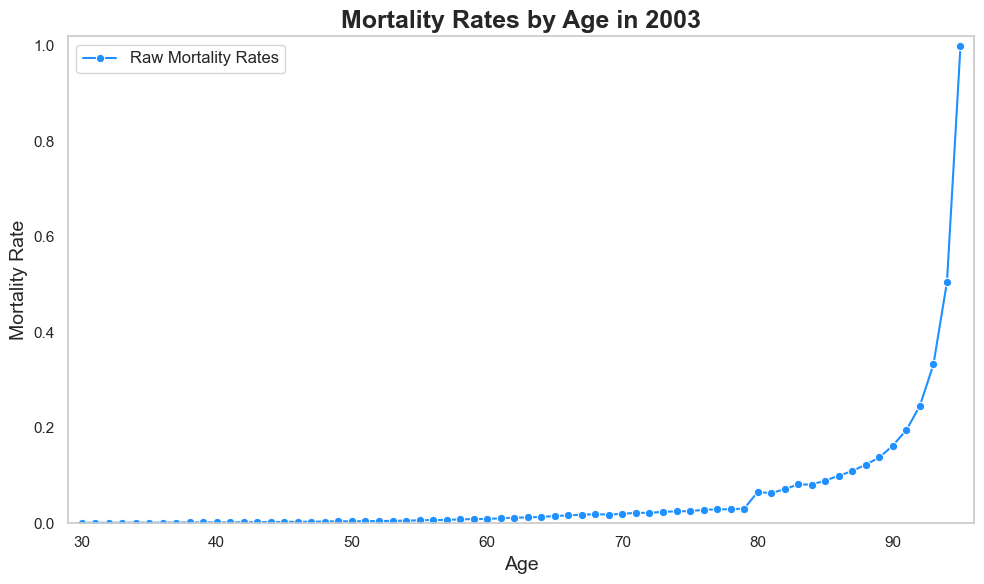

In [5]:
# Set the seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the raw mortality rates using seaborn
sns.lineplot(x=mortality_rates.index, y=mortality_rates.values, marker='o', color='dodgerblue', label='Raw Mortality Rates')

# Set the title with increased font size and bold
plt.title('Mortality Rates by Age in 2003', fontsize=18, fontweight='bold')

# Set axis labels with increased font size
plt.xlabel('Age', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)

# Add the legend and set its position
plt.legend(loc='upper left', fontsize=12)

# Set the range for x and y axes to avoid data points being too close to the chart edges
plt.xlim(min(mortality_rates.index) - 1, max(mortality_rates.index) + 1)
plt.ylim(0, max(mortality_rates.values) + 0.02)

# Remove grid lines
plt.grid(False)

# Optimize the layout to prevent overlapping labels and title
plt.tight_layout()

# Save the figure to the specified path
plt.savefig('/Users/alan/Desktop/海外申请/Predoc/Coding Sample/Python coding sample/Result/Question 1.png')

# Display the chart
plt.show()

In [6]:
# Fit a 20-degree polynomial
coefficients = np.polyfit(mortality_rates.index, mortality_rates.values, 20)
polynomial = np.poly1d(coefficients)

/Users/alan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
# Predict smoothed mortality rates
smoothed_rates = polynomial(mortality_rates.index)

In [8]:
# Set the seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the raw mortality rates as scatter points
sns.scatterplot(x=mortality_rates.index, y=mortality_rates.values, color='dodgerblue', label='Raw Mortality Rates')

# Plot the smoothed mortality rates as a line
sns.lineplot(x=mortality_rates.index, y=smoothed_rates, color='red', label='Smoothed Mortality Rates')

# Set the title with increased font size and bold
plt.title('Mortality Rates by Age in 2003', fontsize=18, fontweight='bold')

# Set the axis labels with increased font size
plt.xlabel('Age', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)

# Add the legend and set its position
plt.legend(loc='upper left', fontsize=12)

# Set the range for x and y axes to avoid data points being too close to the chart edges
plt.xlim(min(mortality_rates.index) - 1, max(mortality_rates.index) + 1)
plt.ylim(0, max(mortality_rates.values) + 0.02)

# Remove the grid lines
plt.grid(False)

# Set the font size for x and y axis ticks
plt.tick_params(axis='both', labelsize=12)

# Optimize the layout to prevent overlapping labels and title
plt.tight_layout()

# Save the figure to the specified path
plt.savefig('/Users/alan/Desktop/海外申请/Predoc/Coding Sample/Python coding sample/Result/Question 2.png')

# Display the chart
plt.show()

In [9]:
# Convert smoothed mortality rates to survival rates（a）
survival_rates = 1 - smoothed_rates

# Calculate the running product of survival rates（b）
running_product = np.cumprod(survival_rates)

# Sum over the running product to get expected additional years of life beyond age 30（c）
additional_years = np.sum(running_product)

# Add 30 to get life expectancy at age 30（d）
life_expectancy_at_30 = 30 + additional_years

# Output the result（e）
print(f'Life Expectancy at Age 30: {life_expectancy_at_30:.2f} years')

Life Expectancy at Age 30: 78.95 years
